# **Problem Statement**
Among all industries, the insurance domain has one of the largest uses of analytics & data science methods. This dataset provides you a taste of working on data sets from insurance companies – what challenges are faced there, what strategies are used, which variables influence the outcome, etc. This is a classification problem. The data has 615 rows and 13 columns.

**Problem**:

Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Datasets/Loan prediction train data.csv")

In [ ]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [ ]:
data["Credit_History"]=data["Credit_History"].astype("object")

In [ ]:
data.drop("Loan_ID",axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(data,test_size=0.2,random_state=42)

#Data Exploration and visualization




In [ ]:
df=df_train.copy()

#Univariate Analysis


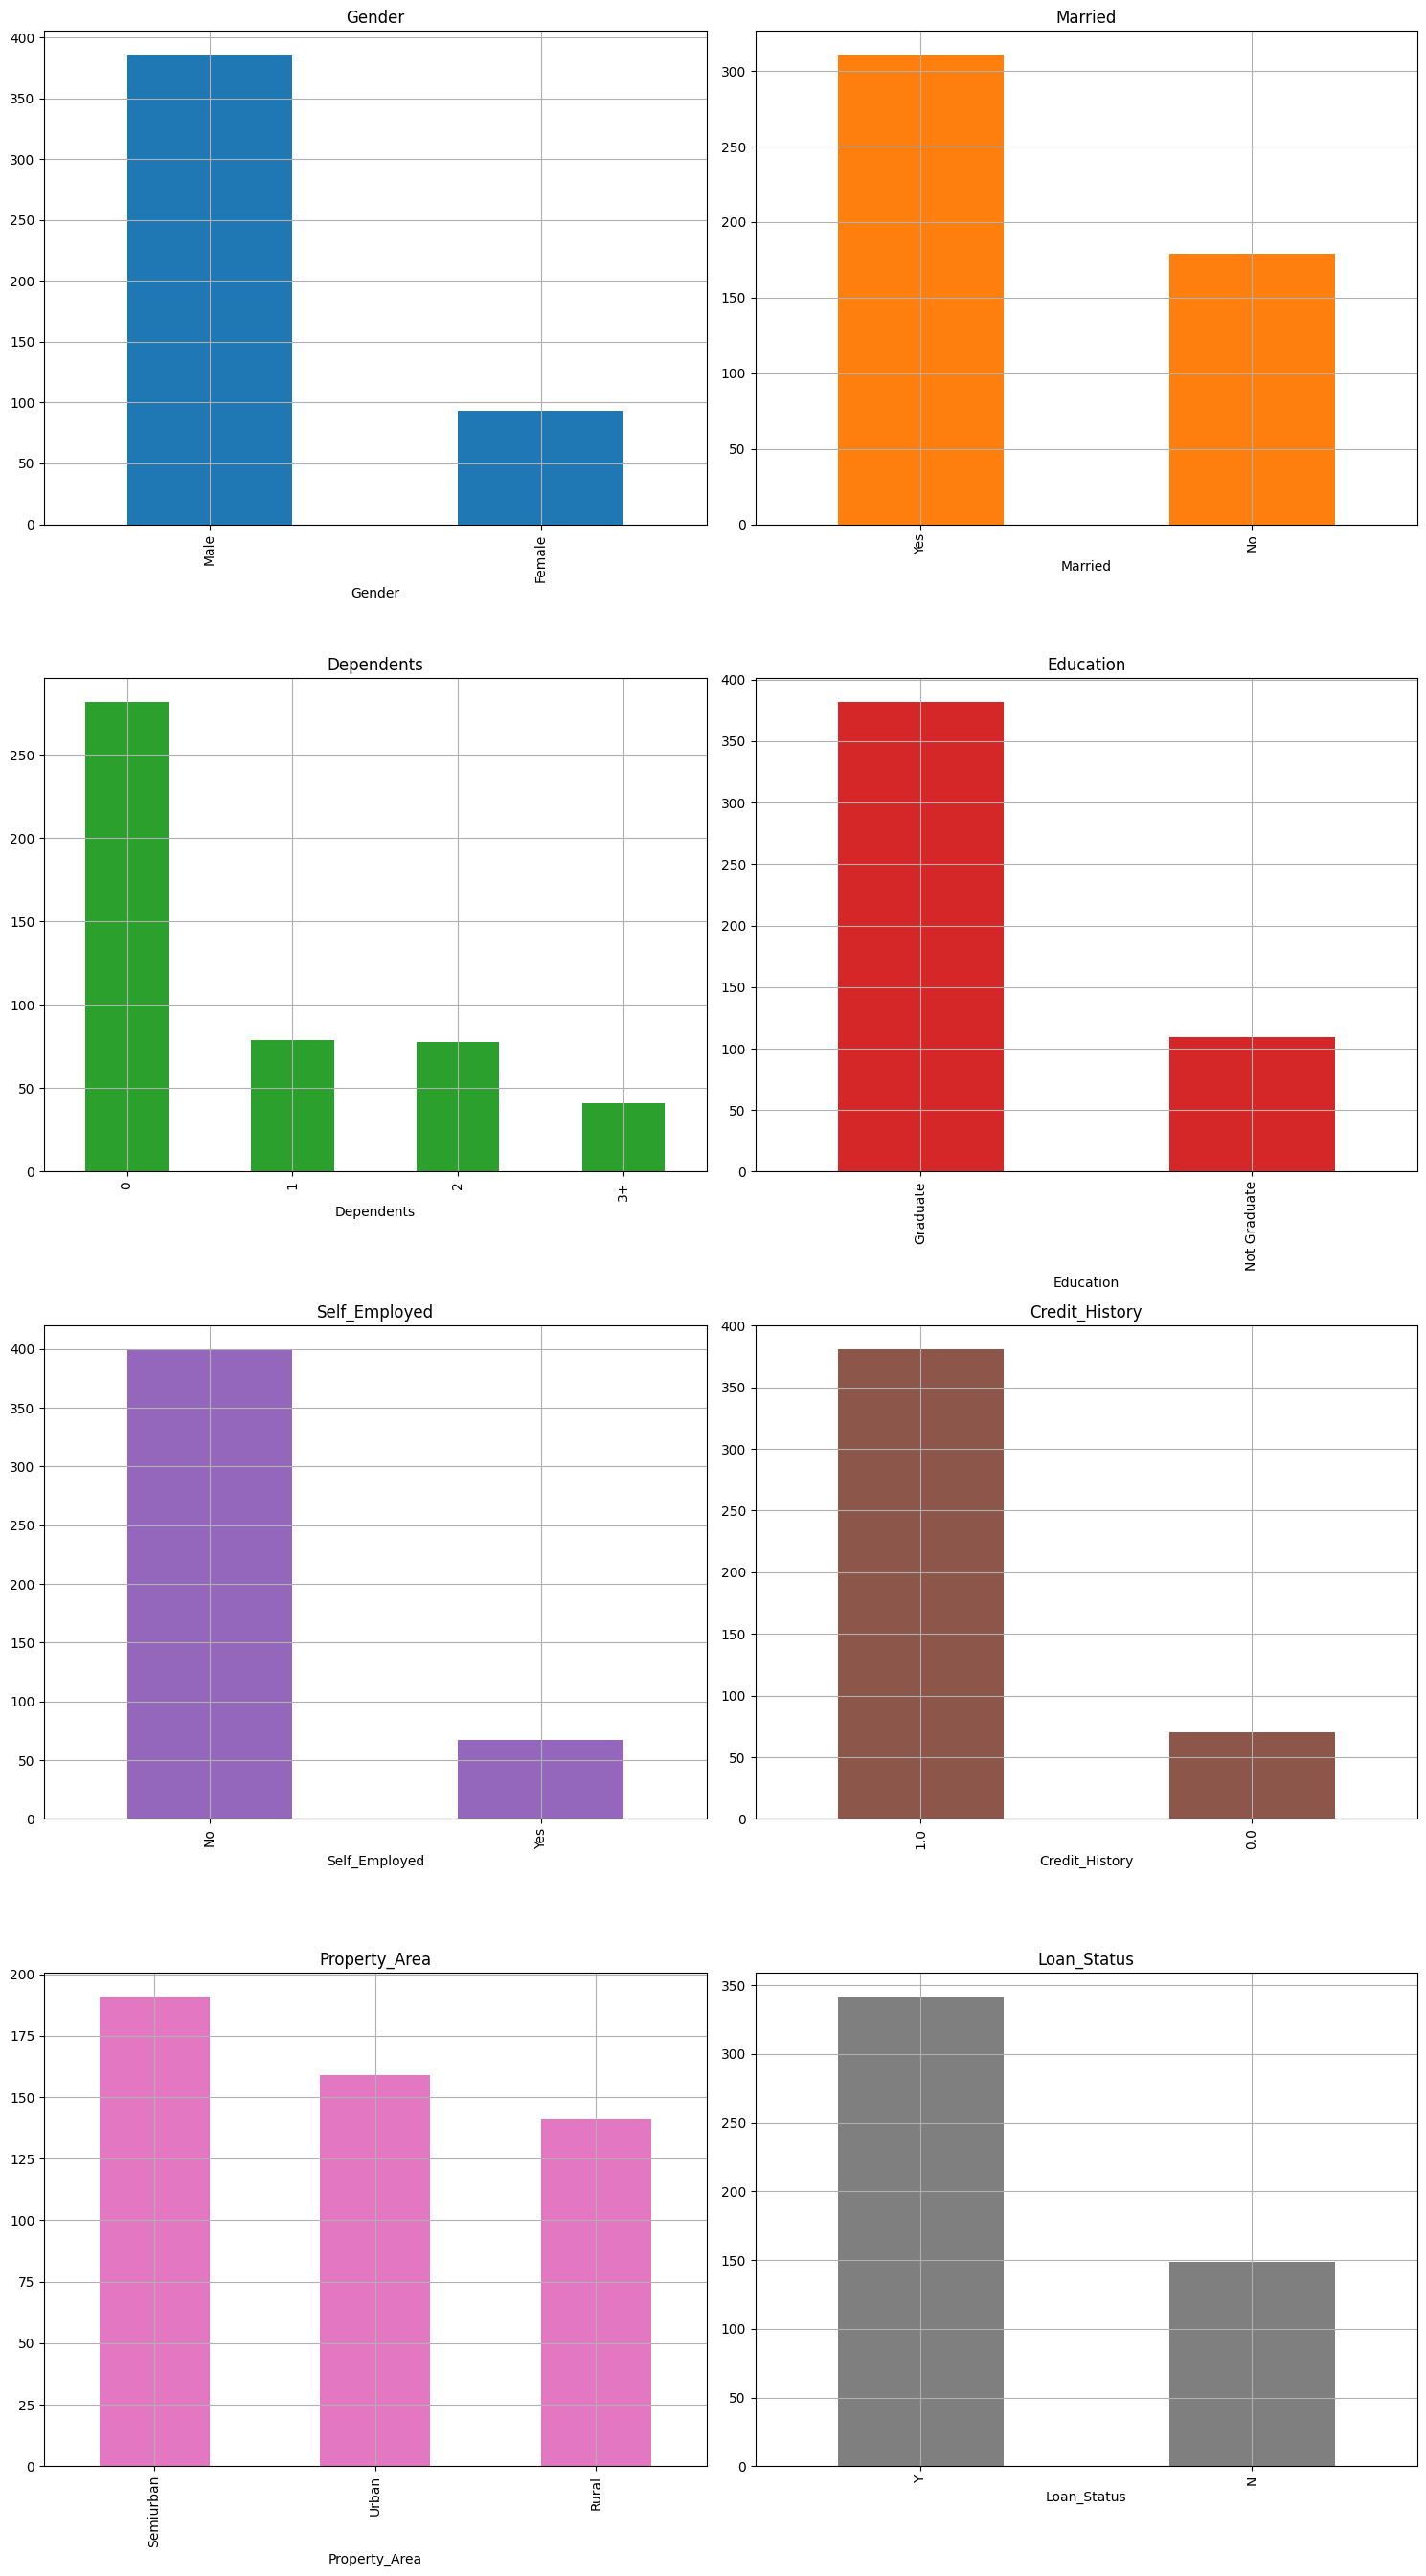

In [ ]:

colors = plt.rcParams["axes.prop_cycle"]()
fig,axes=plt.subplots(4,2,figsize=(15,27))
axes=axes.flatten()
for i,name in enumerate(df.select_dtypes(include="object")):
  ax=axes[i]
  c=next(colors)["color"]
  df[name].value_counts().nlargest(10).plot.bar(ax=ax,color=c)
  ax.set_title(name)
  ax.grid(True)
  plt.tight_layout()

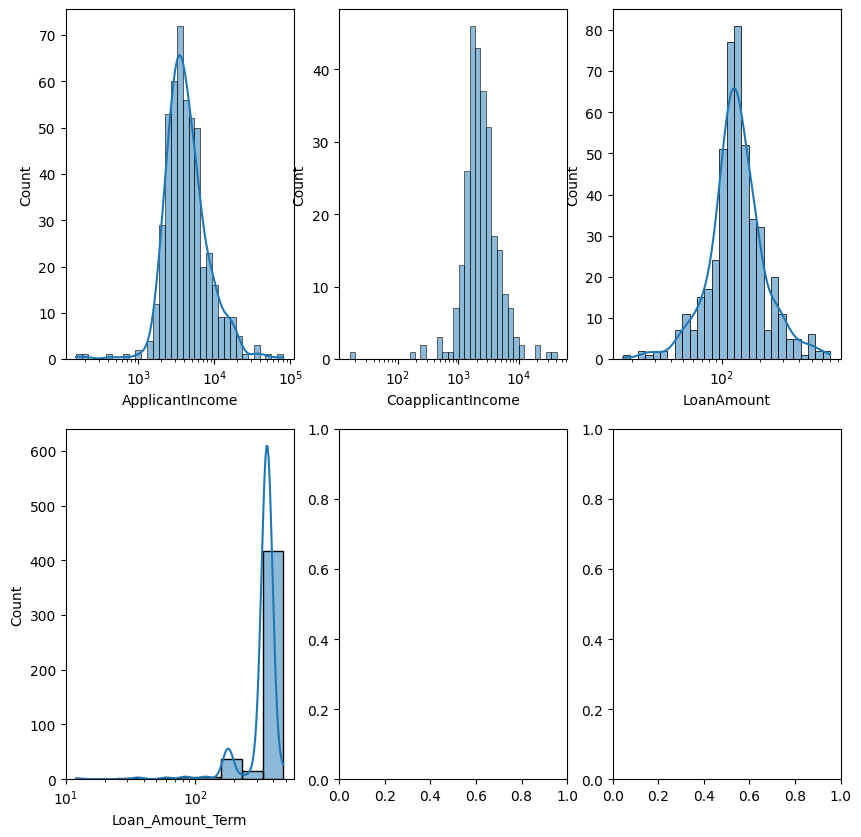

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes = axes.flatten()
for i,name in enumerate(df.select_dtypes(include=np.number)):
  ax = axes[i]
  sns.histplot(df[name],ax=ax,kde=True,log_scale=True)

#Multivariate analysis


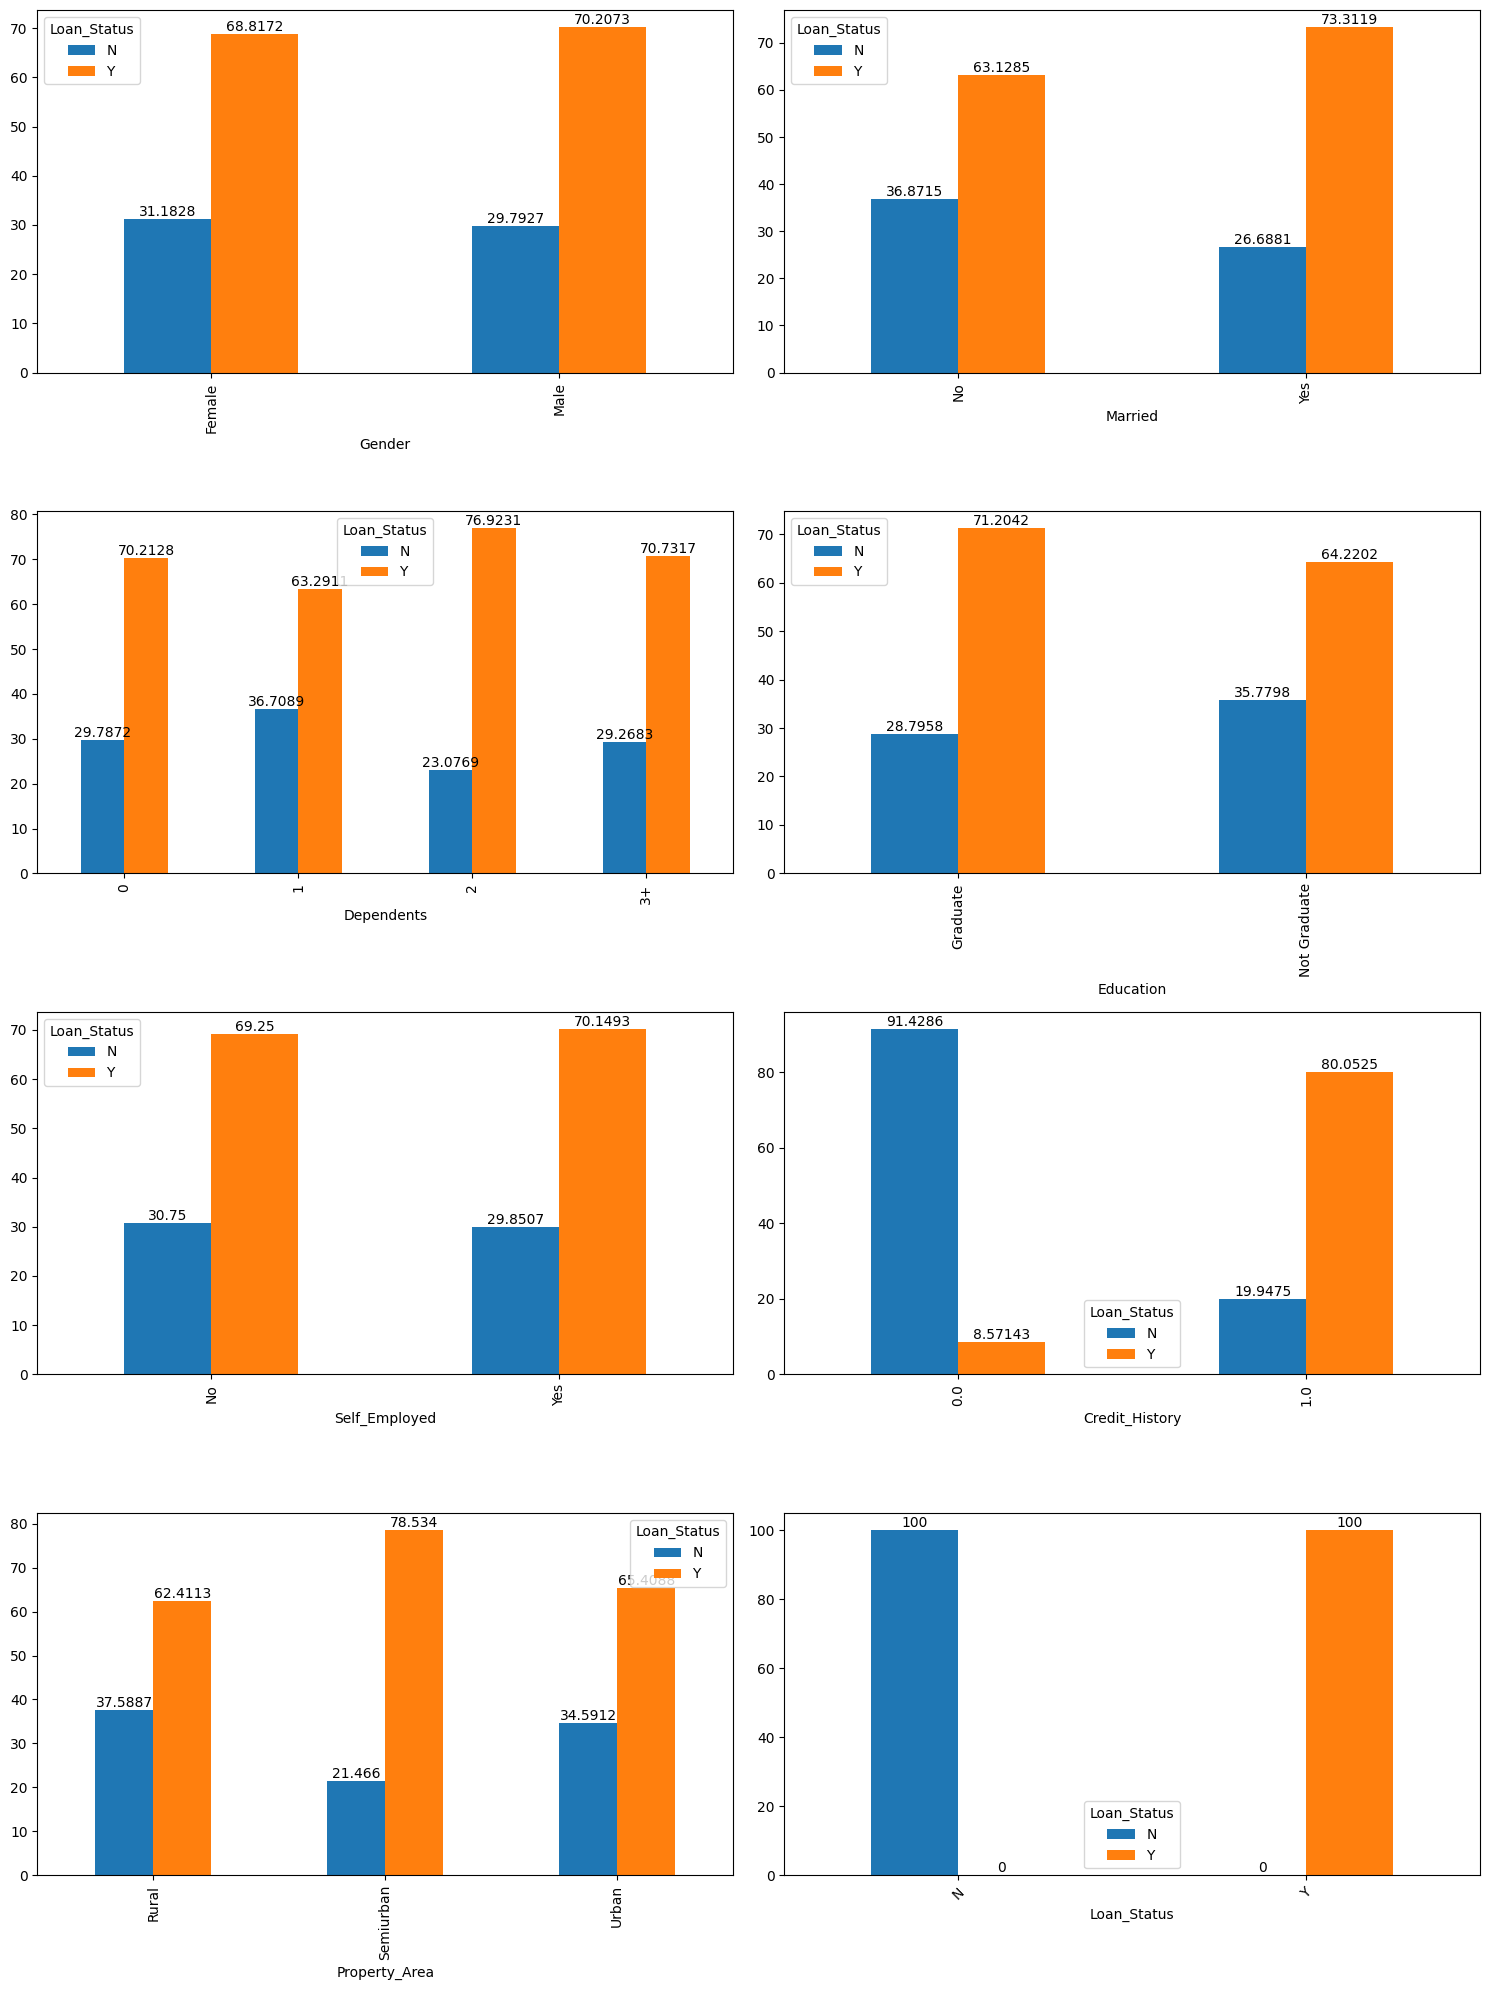

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()
for i,name in enumerate(df.select_dtypes(include="object")):
  ax = axes[i]
  ct=(pd.crosstab(df_train[name],df["Loan_Status"],normalize="index")*100)
  plot = ct.plot(kind='bar',ax=ax)
  for c in plot.containers:
    # set the bar label
    plot.bar_label(c)
  plt.xticks(rotation=45)
  plt.tight_layout()

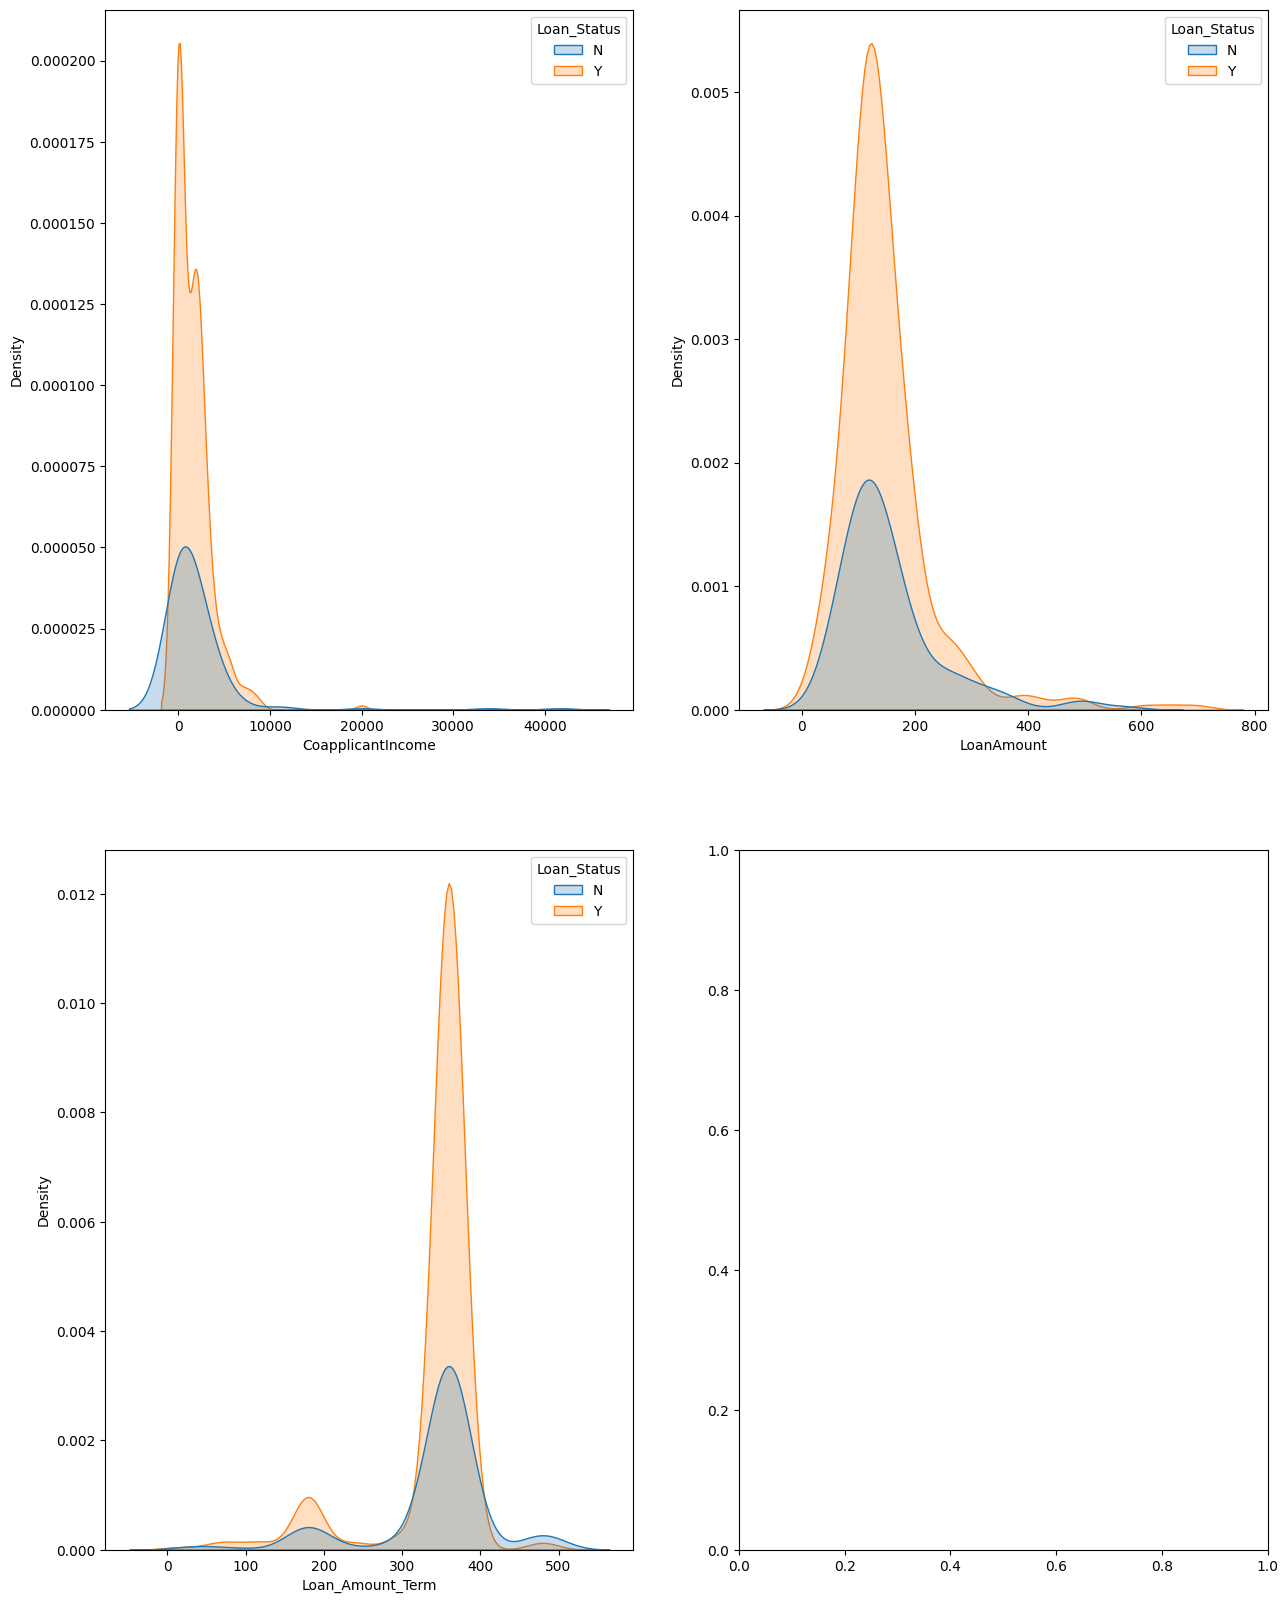

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 20))
axes = axes.flatten()
for i,name in enumerate(df.select_dtypes(include="float64")):
  ax = axes[i]
  sns.kdeplot(x=name,hue="Loan_Status",data=df,ax=ax,fill=True)

In [ ]:
correlation=df.select_dtypes(include="float64").corr()

<Axes: >

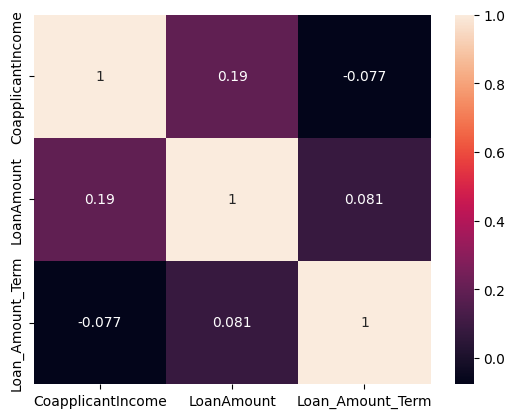

In [ ]:
sns.heatmap(correlation,annot=True)

In [ ]:
#trying data combination
df["Total_income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

In [ ]:
df.select_dtypes(include=np.number).corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_income
ApplicantIncome,1.000000,-0.112545,0.544546,0.026165,0.870149
CoapplicantIncome,-0.112545,1.000000,0.190360,-0.076846,0.391727
LoanAmount,0.544546,0.190360,1.000000,0.080528,0.598027
Loan_Amount_Term,0.026165,-0.076846,0.080528,1.000000,-0.013834
Total_income,0.870149,0.391727,0.598027,-0.013834,1.000000


In [ ]:
df["loantoincomeratio"]=df["LoanAmount"]/df['Total_income']

In [ ]:
df.select_dtypes(include=np.number).corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_income,loantoincomeratio
ApplicantIncome,1.000000,-0.112545,0.544546,0.026165,0.870149,-0.308106
CoapplicantIncome,-0.112545,1.000000,0.190360,-0.076846,0.391727,-0.225714
LoanAmount,0.544546,0.190360,1.000000,0.080528,0.598027,0.174274
Loan_Amount_Term,0.026165,-0.076846,0.080528,1.000000,-0.013834,0.166519
Total_income,0.870149,0.391727,0.598027,-0.013834,1.000000,-0.396902
loantoincomeratio,-0.308106,-0.225714,0.174274,0.166519,-0.396902,1.000000


#Preprocessing data before feeding to algorithms

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 83 to 102
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             479 non-null    object 
 1   Married            490 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      467 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         475 non-null    float64
 8   Loan_Amount_Term   479 non-null    float64
 9   Credit_History     451 non-null    object 
 10  Property_Area      491 non-null    object 
 11  Loan_Status        491 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 66.0+ KB


In [ ]:
x_train,y_train,x_test,y_test=df_train.drop("Loan_Status",axis=1),df_train["Loan_Status"],df_test.drop("Loan_Status",axis=1),df_test["Loan_Status"]

In [ ]:
mapping={"Y":1,"N":0}
y_train=y_train.map(mapping)
y_test=y_test.map(mapping)

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [ ]:
cat_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(drop="first"))
num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

In [ ]:
from sklearn.compose import make_column_selector,make_column_transformer
preprocessing=make_column_transformer((cat_pipeline,make_column_selector(dtype_include="object")),(num_pipeline,make_column_selector(dtype_include=np.number)))

In [ ]:
preprocessing.fit(x_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x78f518487f10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x78f4d0a60af0>)])

In [ ]:
x_train=preprocessing.transform(x_train)
x_test=preprocessing.transform(x_test)

In [ ]:
y_train.shape

(491,)

In [ ]:
#importing differnet model to do cross validate the model which model perform best
from sklearn.model_selection import cross_val_score
cv=5
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
models = [('LR', LogisticRegression(max_iter=1000)),('KNN', KNeighborsClassifier()),
 ('RFC', RandomForestClassifier(n_estimators=500)),
  ('NB', GaussianNB()),
   ('SVM', LinearSVC(max_iter=5000))]

In [ ]:
for name,model in models:
  scores=cross_val_score(model,x_train,y_train,cv=10,scoring="roc_auc")

  print(f"{name}:{np.mean(scores)} SD:{np.std(scores)}")

LR:0.7723177270908363 SD:0.06848269137375951
KNN:0.7233021208483393 SD:0.04867956951122477
RFC:0.7914029611844738 SD:0.06395609184061947
NB:0.751611044417767 SD:0.0806042062200367
SVM:0.7703321328531413 SD:0.06683929070409814


In [ ]:
#we will be apply and tune hyperparameter for Logistic Regression and Random forest classifier


In [ ]:
lr= LogisticRegression(max_iter=1000,random_state=42)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_train,lr.predict(x_train))

0.7127045802425527

In [ ]:
print(roc_auc_score(y_test,lr.predict(x_test)))

0.7030523255813954


In [ ]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
y_train_pred=rfc.predict(x_train)
y_pred=rfc.predict(x_test)
print(roc_auc_score(y_train,y_train_pred))
print(roc_auc_score(y_test,y_pred))

1.0
0.6905523255813952


In [ ]:
#rondom FOrest classifier is overfitting the model let's tune its hyperprameters

In [ ]:
rfc=RandomForestClassifier(max_features="sqrt", max_leaf_nodes=16,
n_estimators=500, n_jobs=-1, random_state=42)
rfc.fit(x_train,y_train)
y_train_pred=rfc.predict(x_train)
y_pred=rfc.predict(x_test)
print(roc_auc_score(y_train,y_train_pred))
print(roc_auc_score(y_test,y_pred))

0.7194159896385258
0.7030523255813954


In [ ]:
rfc=RandomForestClassifier(n_estimators=200)
hp={'max_features': [6, 8, 10,12],
    "max_leaf_nodes":[5,7,10,12]
    }


In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
grid_search = GridSearchCV(rfc, hp, cv=3,
scoring="roc_auc")
grid_search.fit(x_train,y_train)


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_features=6, max_leaf_nodes=10,
                                              n_estimators=500),
             param_grid={'max_features': [6, 8, 10, 12],
                         'max_leaf_nodes': [5, 7, 10, 12]},
             scoring='roc_auc')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'max_leaf_nodes': 10}

In [ ]:
rfc=RandomForestClassifier(n_estimators=500,max_features=6,max_leaf_nodes=10)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(roc_auc_score(y_test,y_pred))


0.7030523255813954


In [ ]:
from scipy.stats import randint

In [ ]:
hp={'max_features': randint(2,16), 'max_leaf_nodes': randint(2,20),"max_depth":randint(2,10)}
rnd_search = RandomizedSearchCV(
rfc, param_distributions=hp, n_iter=10, cv=3,
scoring='roc_auc', random_state=42)

In [ ]:
rnd_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_features=9,
                                                    max_leaf_nodes=13,
                                                    n_estimators=500),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78f4d3d7eaa0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78f4d3d7cbb0>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78f4d3d7e140>},
                   random_state=42, scoring='roc_auc')

In [ ]:
rnd_search.best_params_

{'max_depth': 8, 'max_features': 5, 'max_leaf_nodes': 16}

In [ ]:
rfc=RandomForestClassifier(n_estimators=500,max_features=9,max_leaf_nodes=13,max_depth= 8)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(roc_auc_score(y_test,y_pred))


0.7030523255813954


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7886178861788617